# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime
import csv
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [9]:
record_counter = 0
set_counter = 0

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 2 of set 0 | marktredwitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 3 of set 0 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 4 of set 0 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 5 of set 0 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 6 of set 0 | darab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 7 of set 0 | makakilo city
http://api.openweathermap.org/data/2

Processing record 7 of set 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 8 of set 1 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 9 of set 1 | lukaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 10 of set 1 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 11 of set 1 | ilinsko-podomskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
City not found!
Processing record 12 of set 1 | ewa beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 13 of set 1 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f69

Processing record 14 of set 2 | anaco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 15 of set 2 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 16 of set 2 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 17 of set 2 | takaka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 18 of set 2 | yemtsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 19 of set 2 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 20 of set 2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Pro

Processing record 20 of set 3 | boguchany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 21 of set 3 | urumqi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
City not found!
Processing record 22 of set 3 | kincardine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 23 of set 3 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 24 of set 3 | goure
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 25 of set 3 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 26 of set 3 | kaeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f69131968871

Processing record 26 of set 4 | orda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 27 of set 4 | surt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 28 of set 4 | calama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 29 of set 4 | talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 30 of set 4 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 31 of set 4 | osa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 32 of set 4 | karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 33 o

Processing record 33 of set 5 | padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 34 of set 5 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 35 of set 5 | faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 36 of set 5 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 37 of set 5 | mrakovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 38 of set 5 | yelnya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 39 of set 5 | benidorm
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing r

Processing record 40 of set 6 | payakumbuh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 41 of set 6 | noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 42 of set 6 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 43 of set 6 | quelimane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 44 of set 6 | ziro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 45 of set 6 | luwingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 46 of set 6 | yueyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing re

Processing record 47 of set 7 | voiron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 48 of set 7 | ipanguacu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 49 of set 7 | belaya gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 50 of set 7 | bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 0 of set 8 | naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 1 of set 8 | kenai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 2 of set 8 | tabou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing recor

Processing record 2 of set 9 | les cayes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 3 of set 9 | camocim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 4 of set 9 | ilinge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 5 of set 9 | taitung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 6 of set 9 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
City not found!
Processing record 7 of set 9 | san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 8 of set 9 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436


Processing record 8 of set 10 | lushunkou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
City not found!
Processing record 9 of set 10 | mrirt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
City not found!
Processing record 10 of set 10 | puerto maldonado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 11 of set 10 | mandalgovi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 12 of set 10 | nakhon phanom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 13 of set 10 | yendi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 14 of set 10 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?

Processing record 14 of set 11 | pridonskoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 15 of set 11 | montepuez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 16 of set 11 | lano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 17 of set 11 | tabiauea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
City not found!
Processing record 18 of set 11 | tommot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 19 of set 11 | leshukonskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211f6913196887197a4d3436
Processing record 20 of set 11 | la asuncion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4b9063b211

In [17]:
#Data Frame
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          533
Cloudiness    533
Country       533
Date          533
Humidity      533
Temp          533
Lat           533
Lng           533
Wind Speed    533
dtype: int64

In [18]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,lompoc,1,US,1578343127,37,71.01,34.64,-120.46,4.25
1,marktredwitz,1,DE,1578343174,100,30.99,50.00,12.09,5.32
2,rikitea,91,PF,1578343097,71,76.41,-23.12,-134.97,13.60
3,butaritari,100,KI,1578343101,79,85.08,3.07,172.79,19.01
4,atuona,0,PF,1578343118,72,79.86,-9.80,-139.03,14.79


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

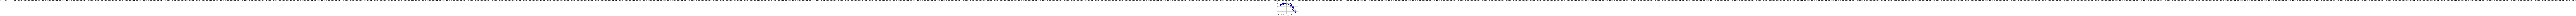

In [19]:
weather_data.plot(kind='scatter', x='Lat', y='Temp', c='DarkBlue')
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("../Images/LatitudeVsTemperature.png")

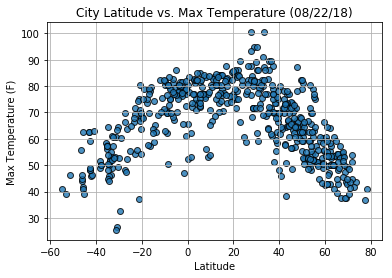

#### Latitude vs. Humidity Plot

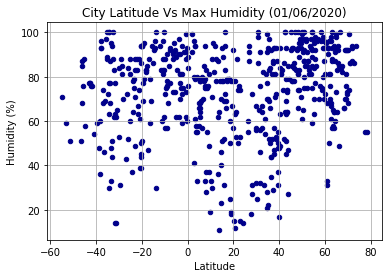

In [37]:
# Latitude Vs Humidity

weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='DarkBlue')
plt.title('City Latitude Vs Max Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("../Images/LatitudeVsHumidity.png")

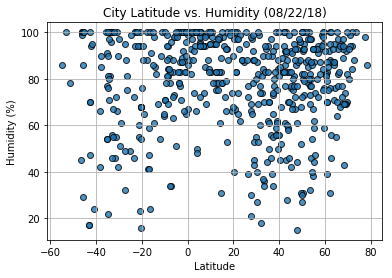

#### Latitude vs. Cloudiness Plot

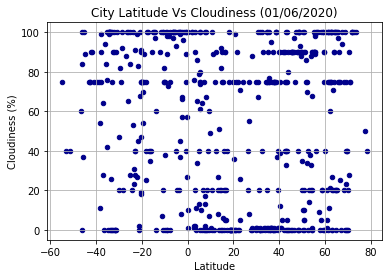

In [38]:
# Latitude Vs Cloudiness

weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='DarkBlue')
plt.title('City Latitude Vs Cloudiness ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("../Images/LatitudeVsCloudiness.png")

#### Latitude vs. Wind Speed Plot

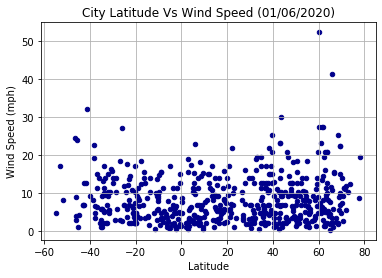

In [39]:
# Latitude Vs Wind Speed

weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='DarkBlue')
plt.title('City Latitude Vs Wind Speed ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../Images/LatitudeVsWindSpeed.png")